In [1]:
import numpy as np
import sys

sys.path.append('./aswale_23')

from aswale_23.problem_generator import ProblemData, generate_random_data
from aswale_23.visualizations import prepare_data_for_gantt_chart, plot_gantt_chart, show_problem_instance
from aswale_23.greedy_solver import greedy_scheduling
from aswale_23.MILP_solver import milp_scheduling

In [22]:
n_tasks = 8
n_robots = 3 
n_skills = 3  
np.random.seed(30)

precedence_constraints = np.array([[1,2], [2,3]])

robots = range(n_robots)
skills = range(n_skills)
tasks = range(n_tasks + 2) # Add start and end task

In [23]:
problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)

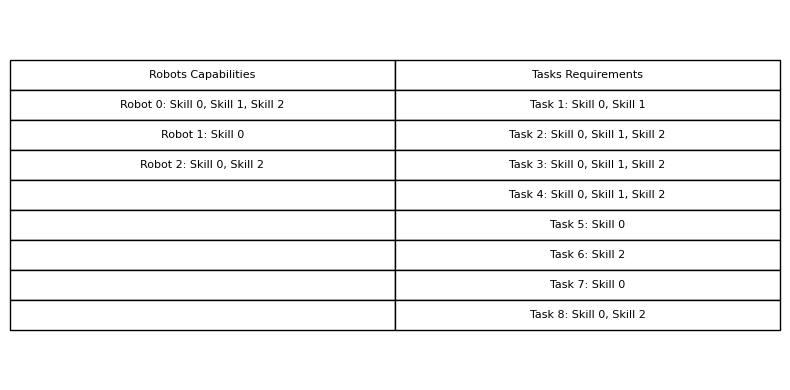

In [24]:
show_problem_instance(problem_instance)

### Greedy algorithm



Full time to completion: 738.2749658944381


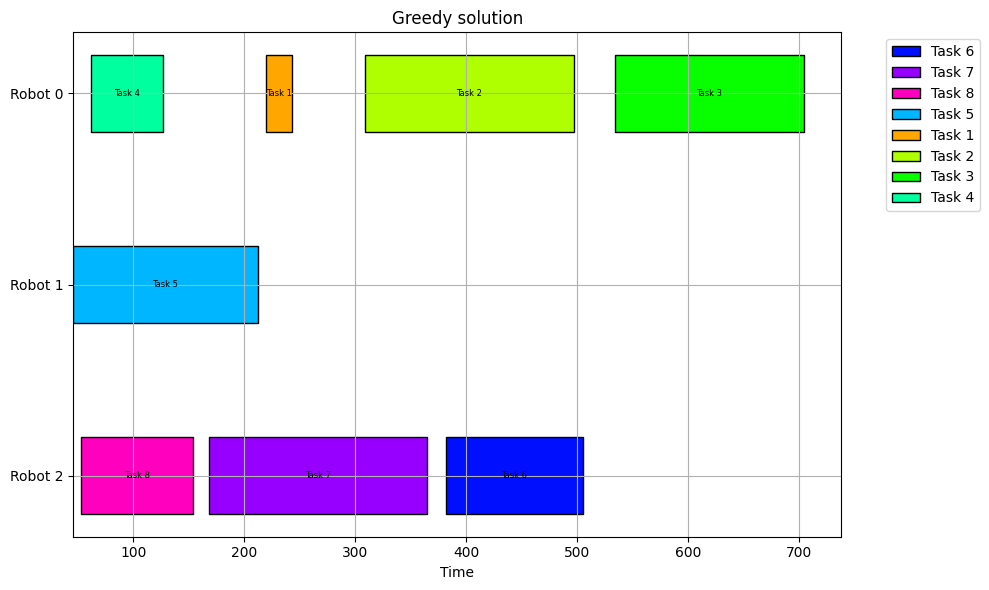

In [25]:
robot_task_assignments, task_start_times = greedy_scheduling(problem_instance)

tasks_to_plot, task_colors = prepare_data_for_gantt_chart(robots, tasks, robot_task_assignments, task_start_times, problem_instance['T_e'])
plot_gantt_chart("Greedy solution", robots, tasks_to_plot, task_colors)


### MILP Solver

In [26]:
problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)

In [ ]:
tasks_to_plot, task_colors = milp_scheduling(problem_instance)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/jakob/thesis/venv_thesis/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/61054d963d814d2abe31855ae14c1d47-pulp.mps -sec 3600 -timeMode elapsed -branch -printingOptions all -solution /tmp/61054d963d814d2abe31855ae14c1d47-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 808 COLUMNS
At line 5234 RHS
At line 6038 BOUNDS
At line 6387 ENDATA
Problem MODEL has 803 rows, 386 columns and 3704 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 3600
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0002I 145 variables fixed
Cgl0003I 52 fixed, 0 tightened bounds, 281 strengthened rows, 15 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 167 strengthened rows, 8 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 194 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tight

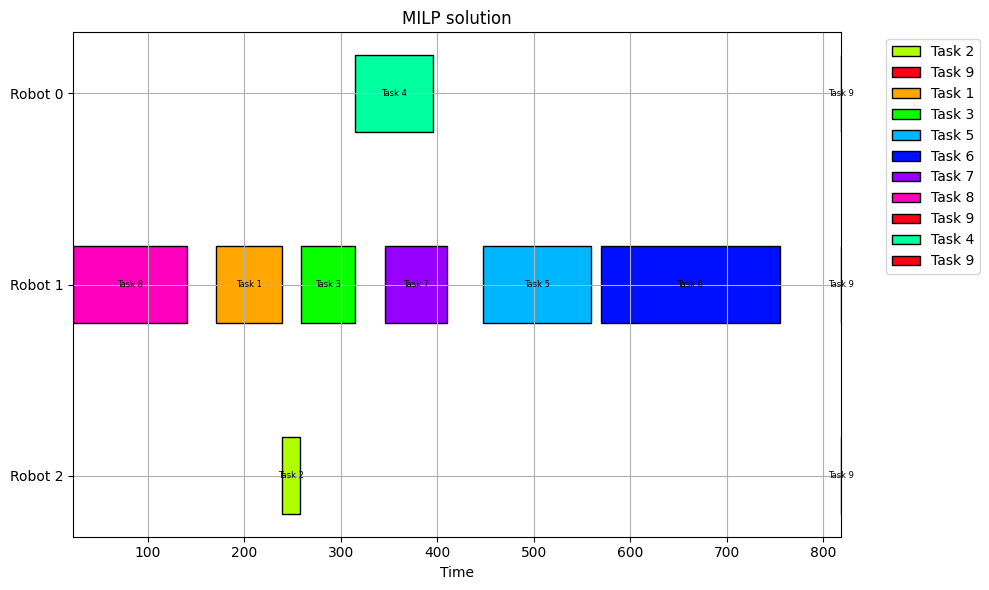

In [ ]:
plot_gantt_chart("MILP solution", robots, tasks_to_plot, task_colors)